## Lab 7 Бинарная классификация

Построить не менее двух моделей бинарной классификации на данных:

📁 https://disk.yandex.ru/i/2qFbBhSeoiyiow

**О датасете:**

Датасет Pima Indians Diabetes Database используется для предсказания вероятности развития диабета на основе различных факторов. Этот датасет состоит из 8 признаков, которые описывают характеристики пациентов. Вот список этих признаков:

	1.	Pregnancies — количество беременностей.
	2.	Glucose — уровень глюкозы в крови (в молях на децилитр).
	3.	BloodPressure — уровень артериального давления (в мм рт. ст.).
	4.	SkinThickness — толщина кожной складки на трицепсе (в мм).
	5.	Insulin — уровень инсулина в крови (в микед/мл).
	6.	BMI (Body Mass Index) — индекс массы тела (в кг/м²).
	7.	DiabetesPedigreeFunction — функция предрасположенности к диабету, основанная на семейной истории.
	8.	Age — возраст пациента (в годах).

🎯 Целевая переменная:

	•	Outcome — наличие или отсутствие диабета (1 — диабет, 0 — нет диабета).

In [44]:
# ваш код здесь
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

In [11]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

df[(df['Glucose'] == 0)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
df['Glucose'][df['Glucose'] == 0] = np.median(df['Glucose'])

In [28]:
df[(df['BloodPressure'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [27]:
df['BloodPressure'][df['BloodPressure'] == 0] = np.median(df['BloodPressure'])

/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_17216/974595515.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['BloodPressure'][df['BloodPressure'] == 0] = np.median(df['BloodPressure'])
/var/folders/7k/0hthbbf925j5rmfcysr

In [31]:
df[(df['SkinThickness'] == 0)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [30]:
df['SkinThickness'][df['SkinThickness'] == 0] = np.median(df['SkinThickness'])

/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_17216/2372114902.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['SkinThickness'][df['SkinThickness'] == 0] = np.median(df['SkinThickness'])
/var/folders/7k/0hthbbf925j5rmfcys

In [32]:
df[(df['Insulin'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
5,5,116,74,23,0,25.6,0.201,30,0
7,10,115,72,23,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,23,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,23,0,30.1,0.349,47,1


In [33]:
df['Insulin'][df['Insulin'] == 0] = np.median(df['Insulin'])

/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_17216/3461412607.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Insulin'][df['Insulin'] == 0] = np.median(df['Insulin'])
/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipy

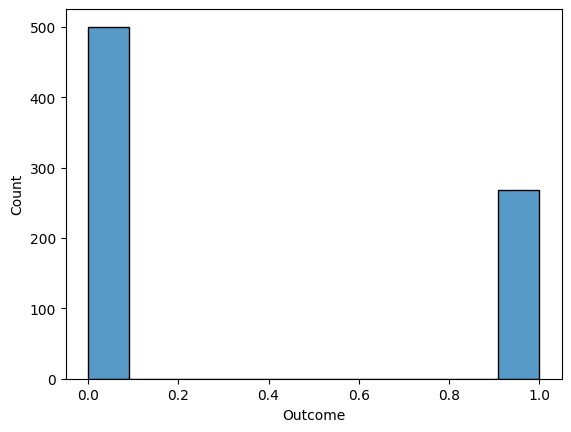

In [34]:
sns.histplot(df['Outcome'])
plt.show()

In [36]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']


In [37]:
features = df.columns
features = features.drop('Outcome')
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [38]:
X, y = SMOTE().fit_resample(X, y) 

/Users/andreypovaliy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


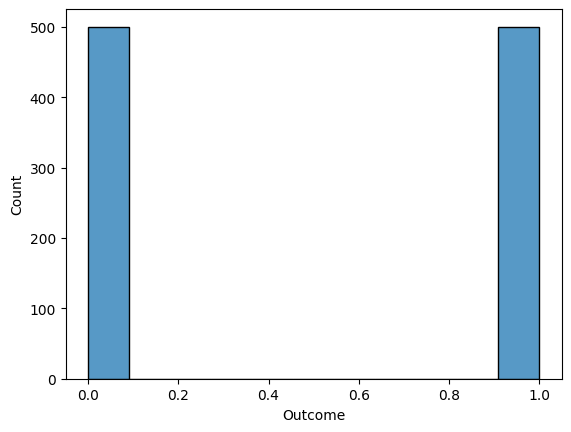

In [39]:
sns.histplot(y)
plt.show()

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

# KNN

In [46]:
k_values = range(1,21)
mean_score = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    mean_score.append(scores.mean())

best_k = k_values[np.argmax(mean_score)]
print(f'Best k={best_k} ; accuracy:{max(mean_score):.3f}')

Best k=1 ; accuracy:0.796


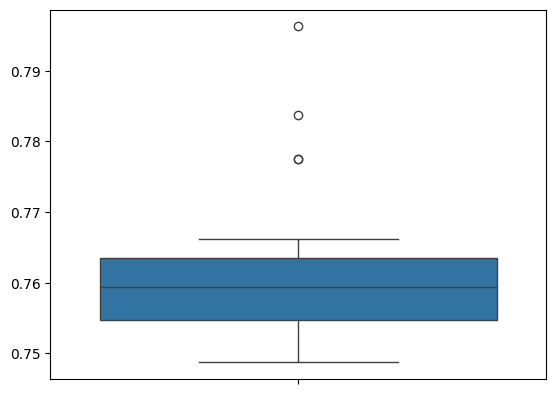

In [47]:
sns.boxplot(mean_score)
plt.show()

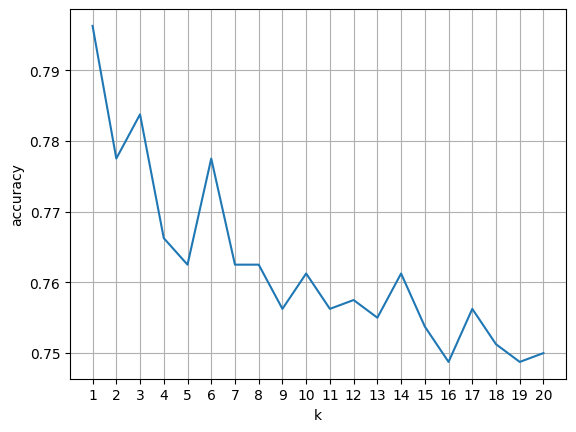

In [49]:
plt.plot(k_values, mean_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [50]:
knn = KNeighborsClassifier(n_neighbors=6)


knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test =  knn.predict(X_test)

In [51]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')
print(f'f1 train: {f1_train:.3f}')
print(f'f1 test: {f1_test:.3f}')
print(f'precision train: {precision_train:.3f}')
print(f'precision test: {precision_test:.3f}')
print(f'recall train: {recall_train:.3f}')
print(f'recall test: {recall_test:.3f}')

accuracy train: 0.836
accuracy test: 0.790
f1 train: 0.832
f1 test: 0.790
precision train: 0.855
precision test: 0.790
recall train: 0.810
recall test: 0.790


In [53]:
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       100
           1       0.79      0.79      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



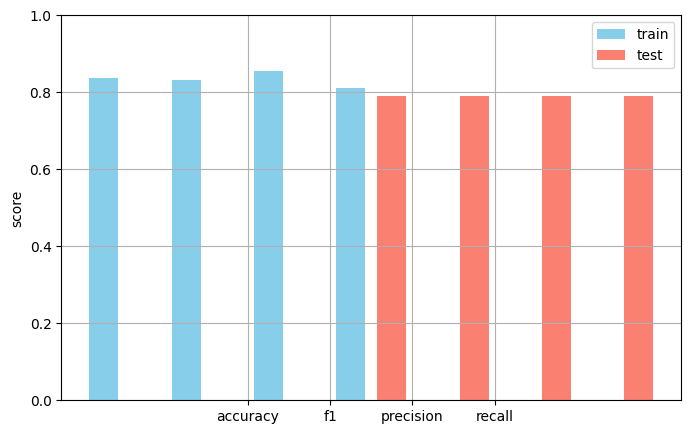

In [54]:
metrics = ['accuracy', 'f1', 'precision', 'recall']
scores_train = [accuracy_train, f1_train, precision_train, recall_train]
scores_test = [accuracy_test, f1_test, precision_test, recall_test]

x = np.arange(len(metrics))

plt.figure(figsize=(8,5))
width = 0.35
plt.bar(x - width/0.2, scores_train, width=width, label='train', color='skyblue')
plt.bar(x + width/0.2, scores_test, width=width, label='test', color = 'salmon')

plt.xticks(x, metrics)
plt.ylabel('score')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

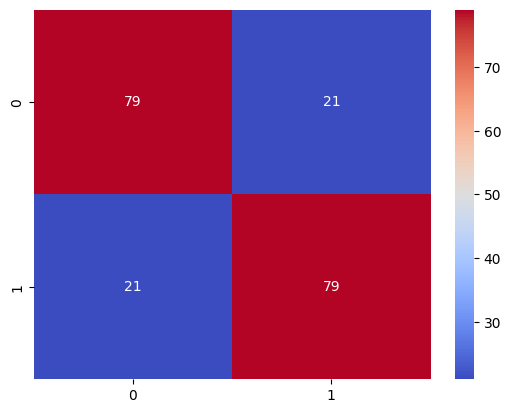

In [55]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Logit

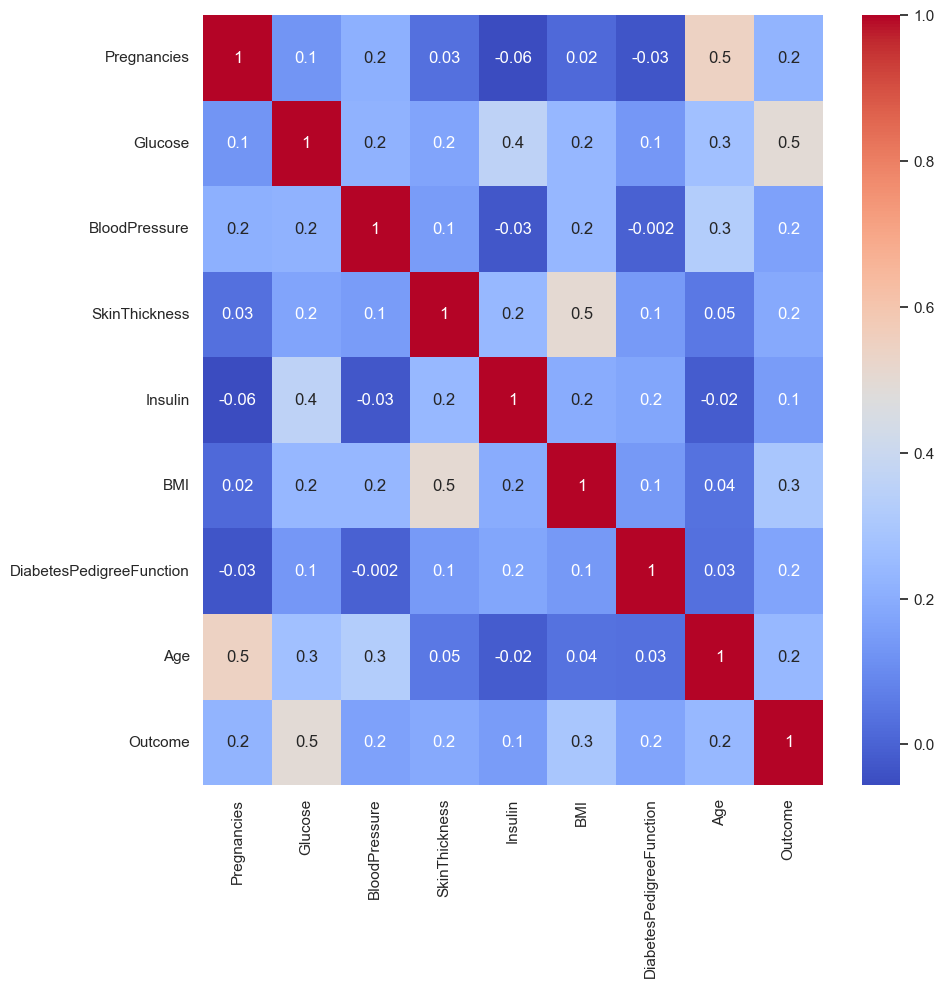

In [57]:
sns.set(rc={'figure.figsize': (10,10)})
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1g')
plt.show()

In [58]:
log_reg = LogisticRegression(penalty='l2', C=0.9, solver='saga', random_state = 1)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)


accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)


In [59]:
report_log_reg_train = classification_report(y_train, y_pred_train)
print(report_log_reg_train)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       400
           1       0.77      0.73      0.75       400

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.75       800
weighted avg       0.76      0.76      0.75       800



In [60]:
report_log_reg_test = classification_report(y_test, y_pred_test)
print(report_log_reg_test)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       100
           1       0.80      0.80      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



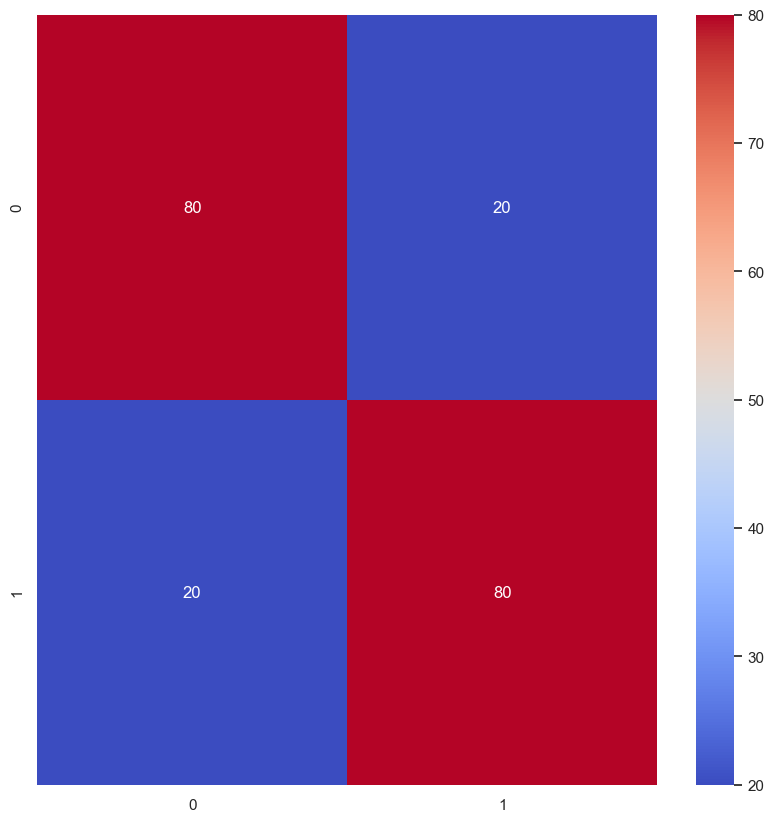

In [61]:
cm_log_reg = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_log_reg, annot=True, cmap='coolwarm')
plt.show()

In [62]:
probabilities = log_reg.predict_proba(X_test)
print(probabilities)

[[0.42209699 0.57790301]
 [0.09179642 0.90820358]
 [0.85178413 0.14821587]
 [0.50230128 0.49769872]
 [0.73545625 0.26454375]
 [0.83265902 0.16734098]
 [0.55239167 0.44760833]
 [0.82238902 0.17761098]
 [0.87750793 0.12249207]
 [0.17983128 0.82016872]
 [0.17618233 0.82381767]
 [0.66112255 0.33887745]
 [0.24913675 0.75086325]
 [0.57478595 0.42521405]
 [0.07990649 0.92009351]
 [0.81995648 0.18004352]
 [0.84737648 0.15262352]
 [0.6676479  0.3323521 ]
 [0.70834977 0.29165023]
 [0.29727099 0.70272901]
 [0.84617733 0.15382267]
 [0.13600174 0.86399826]
 [0.63390673 0.36609327]
 [0.25891597 0.74108403]
 [0.50149087 0.49850913]
 [0.60171369 0.39828631]
 [0.56115063 0.43884937]
 [0.83218324 0.16781676]
 [0.48604797 0.51395203]
 [0.43831686 0.56168314]
 [0.17279905 0.82720095]
 [0.72416338 0.27583662]
 [0.91460944 0.08539056]
 [0.54962727 0.45037273]
 [0.27657698 0.72342302]
 [0.85061931 0.14938069]
 [0.16352135 0.83647865]
 [0.96465988 0.03534012]
 [0.07710202 0.92289798]
 [0.85501602 0.14498398]


In [63]:
y_test

582    0
861    1
742    0
683    1
616    0
      ..
121    0
413    0
67     0
138    0
46     0
Name: Outcome, Length: 200, dtype: int64

In [64]:
params = { 'penalty': ['l1', 'l2'],
           'C': [0.01, 0.1, 1, 10, 100],
           'solver': ['liblinear', 'saga']
}
gs = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.7475000000000002


In [65]:
log_reg_param = LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state = 1)
log_reg_param.fit(X_train, y_train)

y_pred_train = log_reg_param.predict(X_train)
y_pred_test = log_reg_param.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [66]:
print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')

accuracy train: 0.755
accuracy test: 0.795


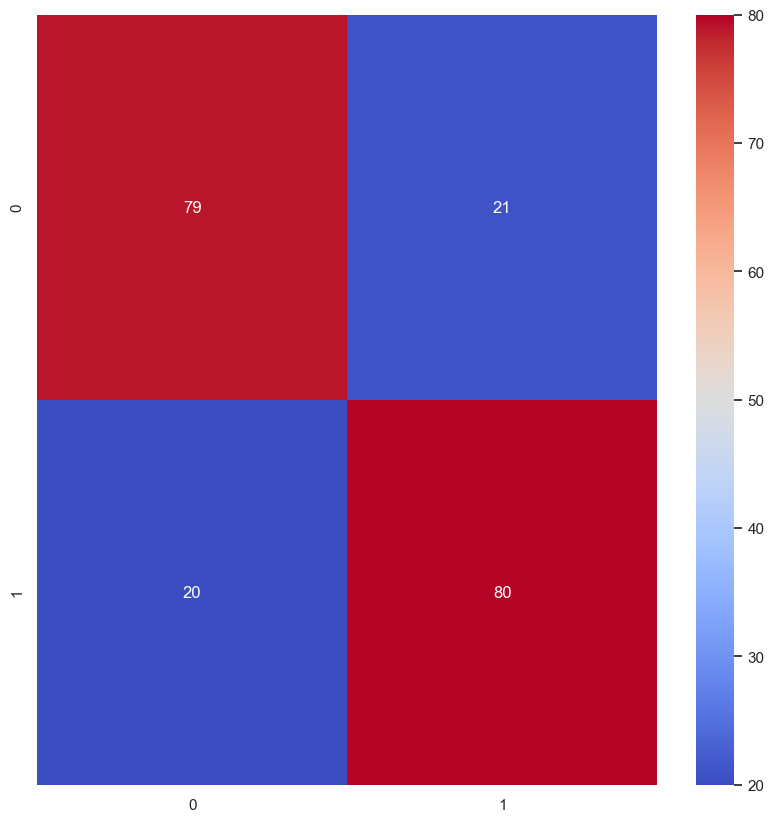

In [67]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# DECISION TREE

In [68]:
d_tree = DecisionTreeClassifier(max_depth=2, max_features=3, random_state=1)
d_tree.fit(X_train, y_train)

y_pred_train = d_tree.predict(X_train)
y_pred_test = d_tree.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')

accuracy train: 0.654
accuracy test: 0.635


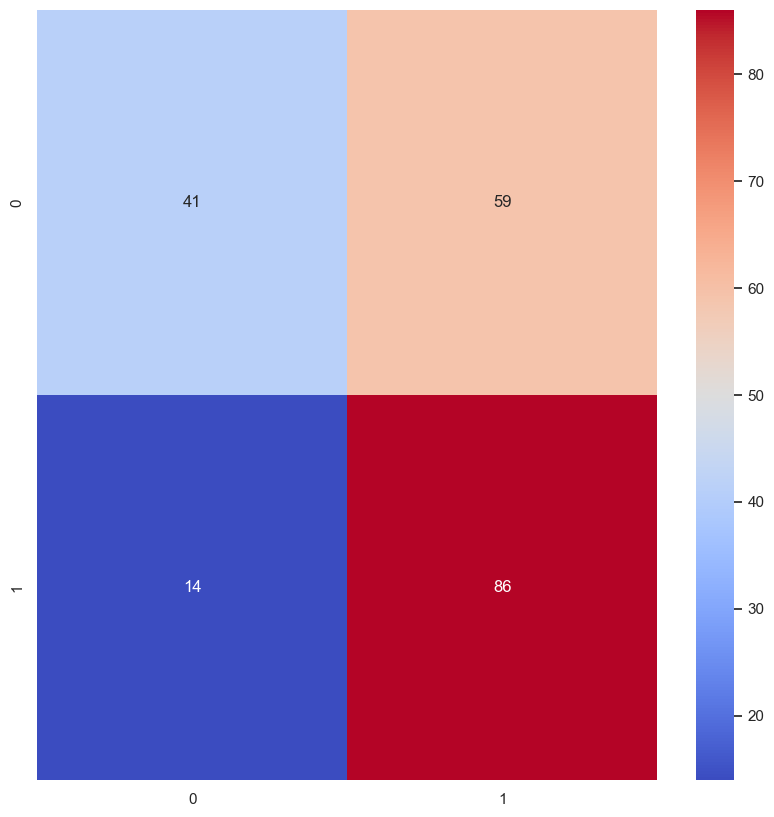

In [69]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

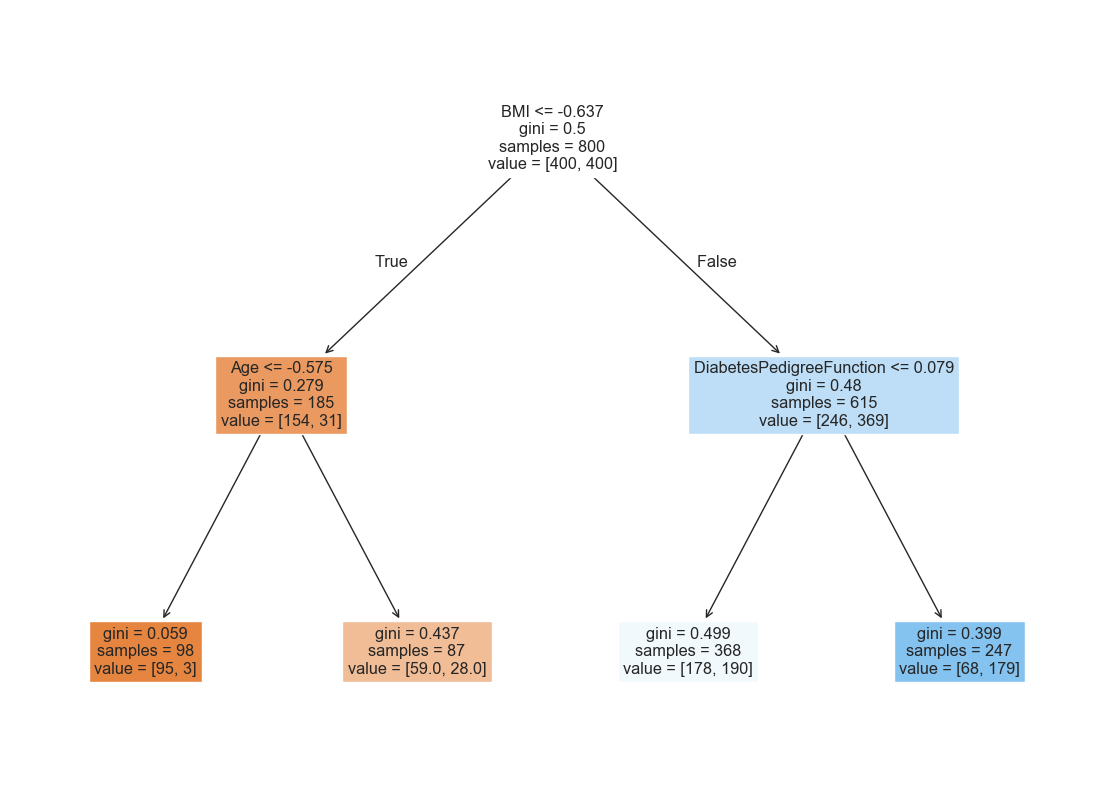

In [71]:
plt.figure(figsize=(14, 10))
plot_tree(d_tree, filled=True, feature_names=features)
plt.show()